# Welcome to WOA7015 Advance Machine Learning Lab - Week 3
This code is generated for the purpose of WOA7015 module.




# The effect of imbalanced data on AUROC 
The following code evaluates the effect of imbalanced data on the AUROC of TPR-FPR curve. 


In [1]:
# roc curve and auc on an imbalanced dataset
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler


In [4]:
# generate 2 class dataset 
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1000)

print(X)
print('-------------------------------------------------------------------------------------------')
print(y)


[[-0.32584935  0.21897754  0.62061895 ...  2.84071377 -0.02582733
  -0.40885762]
 [-1.12624124 -0.86026727 -0.89264356 ... -0.92962064  0.59483549
   1.24052468]
 [-0.48993428 -0.7453348  -1.43801838 ... -1.67525801 -0.09994425
  -0.46569289]
 ...
 [ 0.47406074 -1.9209351   0.41681779 ...  1.04574815  1.092832
  -0.01541749]
 [-0.62731673 -0.94336697 -1.50694171 ... -0.85092941  0.99046917
   2.19583454]
 [ 0.88990126  0.81857103 -2.12551556 ...  1.00271323 -0.88101446
  -0.81149645]]
-------------------------------------------------------------------------------------------
[1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0
 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0
 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1
 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 1 0 1
 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 0 1 0 0 0 0 1 0 0
 1 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 1 0 1 1 

In [5]:
# split into train/testhu sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=1000)

print('trainy - class0: ', len(trainy)-trainy.sum())
print('trainy - class1: ', trainy.sum())
print('---------------------------------------------------------------------')
print('testy - class0: ', len(testy)-testy.sum())
print('testy - class1: ', testy.sum())
print('=====================================================================')

# make testing dataset balance
undersample = RandomUnderSampler(sampling_strategy='majority')
testX, testy = undersample.fit_resample(testX, testy)

print('Balanced Testing date')
print('testy - class0: ', len(testy)-testy.sum())
print('testy - class1: ', testy.sum())

trainy - class0:  253
trainy - class1:  247
---------------------------------------------------------------------
testy - class0:  249
testy - class1:  251
Balanced Testing date
testy - class0:  249
testy - class1:  249


In [6]:
# fit a model with training data
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)


LogisticRegression()

nth 0:positive: 249 negative: 249
---------------------------------------------
nth 1:positive: 225 negative: 249
---------------------------------------------
nth 2:positive: 200 negative: 249
---------------------------------------------
nth 3:positive: 175 negative: 249
---------------------------------------------
nth 4:positive: 150 negative: 249
---------------------------------------------
nth 5:positive: 125 negative: 249
---------------------------------------------
nth 6:positive: 100 negative: 249
---------------------------------------------
nth 7:positive: 75 negative: 249
---------------------------------------------
nth 8:positive: 50 negative: 249
---------------------------------------------
nth 9:positive: 25 negative: 249
---------------------------------------------


Text(0.5, 1.0, 'decreasing positive sample')

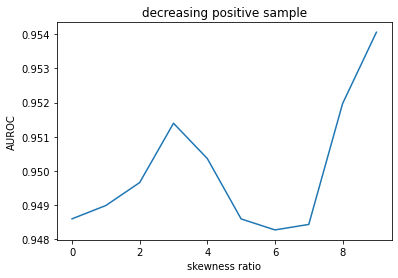

In [7]:
# repeat with different skewness 
roc_list = []
lr_acc = []
k=1
for i in range(0, 10):
  pos_ind = np.where(testy==1)[0]
  n = int(i/10 * len(pos_ind))
  tmp_testX, tmp_testy = np.copy(testX), np.copy(testy)
  tmp_testX = np.delete(tmp_testX, pos_ind[:n], axis=0)
  tmp_testy = np.delete(tmp_testy, pos_ind[:n], axis=0)
  print('nth %d:positive: %d negative: %d' 
        % (i, tmp_testy.sum(), tmp_testy.shape[0] - tmp_testy.sum()))
  print('---------------------------------------------')
  
  # predict probabilities
  lr_pred = model.predict(tmp_testX)
  lr_probs = model.predict_proba(tmp_testX)
  # keep probabilities for the positive outcome only
  lr_probs = lr_probs[:, 1]
  # calculate scores
  lr_auc = roc_auc_score(tmp_testy, lr_probs)

  # summarize scores
  # print('iteration %d: Logistic: ROC AUC=%.3f' % (k, lr_auc))
  k += 1
  # calculate roc curves
  lr_fpr, lr_tpr, _ = roc_curve(tmp_testy, lr_probs)
  roc_list.append(lr_auc)

plt.plot(np.arange(0, len(roc_list)), roc_list)
plt.xlabel('skewness ratio')
plt.ylabel('AUROC')
plt.title('decreasing positive sample')


# Exercise 1:

Does the AUROC (TPR vs FPR) affected by imbalanced class?




---
From the graph generated, the AUROC varies between 0.949 to 0.954 with a oscillating characteristics as the skewness ratio increases. It could be said that the AUROC is not affected by the imbalanced class. <br>
This conclusion can be supported by an article, [Unbalanced Data? Stop Using ROC-AUC and Use AUPRC Instead](https://towardsdatascience.com/imbalanced-data-stop-using-roc-auc-and-use-auprc-instead-46af4910a494), by Daniel Rosenberg where it is shown that the PRC can measure the performance of a model much better than ROC when the data set is imbalanced. <br>
Within the article, it was further explained that the insensitivity of the ROC is attributed to the FPR where the change is not noticeable, "The change in FPR is slow compared to the change in recall, given unbalanced data. This factor drives all the difference."

# The effect of imbalanced data on AUROC of PR curve and F1 score

> Блок с отступами


The following code evaluates the effect of imbalanced data on the AUROC of Precision-Recall and F1 value. 


In [8]:
# roc curve and auc on an imbalanced dataset
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc, f1_score
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt


In [9]:
# generate 2 class dataset 
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1000)

print(X)
print('-----------')
print(y)


[[-0.32584935  0.21897754  0.62061895 ...  2.84071377 -0.02582733
  -0.40885762]
 [-1.12624124 -0.86026727 -0.89264356 ... -0.92962064  0.59483549
   1.24052468]
 [-0.48993428 -0.7453348  -1.43801838 ... -1.67525801 -0.09994425
  -0.46569289]
 ...
 [ 0.47406074 -1.9209351   0.41681779 ...  1.04574815  1.092832
  -0.01541749]
 [-0.62731673 -0.94336697 -1.50694171 ... -0.85092941  0.99046917
   2.19583454]
 [ 0.88990126  0.81857103 -2.12551556 ...  1.00271323 -0.88101446
  -0.81149645]]
-----------
[1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0
 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0
 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1
 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 1 0 1
 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 0 1 0 0 0 0 1 0 0
 1 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 0 0 1 0
 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0

In [10]:
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=1000)

print('trainy - class0: ', len(trainy)-trainy.sum())
print('trainy - class1: ', trainy.sum())
print('----------------------')
print('testy - class0: ', len(testy)-testy.sum())
print('testy - class1: ', testy.sum())
print('============================')

# make testing dataset balance
undersample = RandomUnderSampler(sampling_strategy='majority')
testX, testy = undersample.fit_resample(testX, testy)

print('Balanced Testing date')
print('testy - class0: ', len(testy)-testy.sum())
print('testy - class1: ', testy.sum())


trainy - class0:  253
trainy - class1:  247
----------------------
testy - class0:  249
testy - class1:  251
Balanced Testing date
testy - class0:  249
testy - class1:  249


In [11]:
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)

LogisticRegression()

nth 0:positive: 249 negative: 249
---------------------------------------------
nth 1:positive: 225 negative: 249
---------------------------------------------
nth 2:positive: 200 negative: 249
---------------------------------------------
nth 3:positive: 175 negative: 249
---------------------------------------------
nth 4:positive: 150 negative: 249
---------------------------------------------
nth 5:positive: 125 negative: 249
---------------------------------------------
nth 6:positive: 100 negative: 249
---------------------------------------------
nth 7:positive: 75 negative: 249
---------------------------------------------
nth 8:positive: 50 negative: 249
---------------------------------------------
nth 9:positive: 25 negative: 249
---------------------------------------------


Text(0.5, 1.0, 'decreasing positive sample')

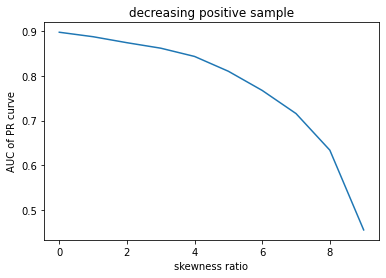

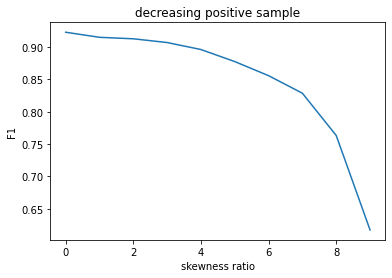

In [ ]:
# repeat with different skewness 
roc_list = []
f1_list = []

k=1
for i in range(0, 10):
  pos_ind = np.where(testy==1)[0]
  n = int(i/10 * len(pos_ind))
  tmp_testX, tmp_testy = np.copy(testX), np.copy(testy)
  tmp_testX = np.delete(tmp_testX, pos_ind[:n], axis=0)
  tmp_testy = np.delete(tmp_testy, pos_ind[:n], axis=0)
  print('nth %d:positive: %d negative: %d' 
        % (i, tmp_testy.sum(), tmp_testy.shape[0] - tmp_testy.sum()))
  print('---------------------------------------------')
  

  # predict probabilities
  lr_probs = model.predict_proba(tmp_testX)
  # keep probabilities for the positive outcome only
  lr_probs = lr_probs[:, 1]
  # predict class values
  yhat = model.predict(tmp_testX)
  # calculate precision and recall for each threshold
  lr_precision, lr_recall, _ = precision_recall_curve(tmp_testy, lr_probs)
  # calculate scores 
  lr_f1, lr_auc = f1_score(tmp_testy, yhat), auc(lr_recall, lr_precision)
  # summarize scores
  # print('iteration%d Logistic: f1=%.3f auc=%.3f' % (k, lr_f1, lr_auc))
  k += 1
  roc_list.append(lr_auc)
  f1_list.append(lr_f1)

plt.plot(np.arange(0, len(roc_list)), roc_list)
plt.xlabel('skewness ratio')
plt.ylabel('AUC of PR curve')
plt.title('decreasing positive sample')

plt.figure()
plt.plot(np.arange(0, len(roc_list)), f1_list)
plt.xlabel('skewness ratio')
plt.ylabel('F1')
plt.title('decreasing positive sample')


# Exercise 2 (4%):
Does the AUROC (Precision vs Recall), F1 score affected by imbalanced class?

---
From the graph of AUPRC, it can be seen that the value of the AUPRC decrease from around 0.9 to around 0.5 as the skewness ratio increase from 0 to 8. It is obvious that the AUPRC is affected by the imbalanced of data set. <br>
Similarly, it is seen that the F1 score also decreases from 0.9 to 0.65 as the skewness ratio increases from 0 to 8. <br>
Thus, both the AUPRC and F1 score are sensitive to measuring the performance of model when the data set is imbalance. This might attribute to the measurement of FN and FP.<br><br>
$Recall = {TP \over TP + FN}$ <br>
$Precision = {TP \over TP + FP}$ <br>
$F1 = {TP \over TP + {1 \over 2} (FP + FN)}$

# ***Let's go back to power point - slide 15***

# Convex function

This is the code to generate the graph in slide 38

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

x = np.arange(-2, 2, 0.01)

# choose one function to try
# f = lambda x: 0.5 * x ** 2 # Convex
#f = lambda x: np.cos(np.pi * x)  # Nonconvex
f = lambda x: -0.5 * x ** 4  # Nonconvex

filenames=[]
for lamda in np.arange(0, 1, 0.02):
  # LHS
  tmp_x = lamda*x[0] + (1-lamda)*x[-1]

  # RHS
  x_line, y_line = np.array([x[0], x[-1]]), np.array([lamda*f(x[0]), (1-lamda)*f(x[-1])])

  # compute LHS and RHS
  LHS = f(tmp_x)
  RHS = lamda*f(x[0]) + (1-lamda)*f(x[-1])
  if LHS > RHS:
    print('At lamda %0.3f, it is concave' % lamda)
    print('lhs %.5f rhs %.5f' % (LHS, RHS))

  plt.figure()
  # original graph
  plt.plot(x, f(x), label='f(x)')
  # plot RHS
  plt.plot(x_line, y_line, label='%0.3f' % lamda)
  # plot LHS
  plt.scatter(tmp_x, f(tmp_x))
  #title, legennd
  plt.title('lhs %.3f rhs %.3f' % (LHS, RHS))
  plt.legend()
  plt.savefig('lamda %0.3f.png' % lamda)
  # plt.close()
  filenames.append('lamda %0.3f.png' % lamda)

# Build GIF
with imageio.get_writer('mygif.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

# Understand how learning rate affects your SGD optimization

We will train a neural network for a pretty simple task, i.e. calculating the exclusive-or (XOR) of two input. 

<br> 
<img src="https://raw.githubusercontent.com/shiernee/Advanced_ML/main/Week3/XOR.jpg" width="512"/>



In [13]:
import random
import numpy as np

In [16]:
# generate a function for XOR
x1 = random.randint(0, 1)
x2 = random.randint(0, 1)
yy = 0 if (x1 == x2) else 1

print('x1:', x1)
print('x2:',x2)
print('yy:',yy)

x1: 1
x2: 1
yy: 0


In [19]:
x1 = random.randint(0, 1)
x2 = random.randint(0, 1)
yy = 0 if (x1 == x2) else 1

print('x1:', x1)
print('x2:',x2)
print('yy:',yy)

# centered at zero
x1 = 2. * (x1 - 0.5)
x2 = 2. * (x2 - 0.5)
yy = 2. * (yy - 0.5)

print('after centered')
print('x1:', x1)
print('x2:',x2)
print('yy:',yy)

x1: 1
x2: 1
yy: 0
after centered
x1: 1.0
x2: 1.0
yy: -1.0


In [20]:
x1 = random.randint(0, 1)
x2 = random.randint(0, 1)
yy = 0 if (x1 == x2) else 1

# centered at zero
x1 = 2. * (x1 - 0.5)
x2 = 2. * (x2 - 0.5)
yy = 2. * (yy - 0.5)

# add noise
x1 += 0.1 * random.random()
x2 += 0.1 * random.random()
yy += 0.1 * random.random()

print('x1:', x1)
print('x2:',x2)
print('yy:',yy)

x1: 1.0917544011760465
x2: 1.0767232845136954
yy: -0.9013353551788232


In [21]:
# make it into function 
def make_data():
    x1 = random.randint(0, 1)
    x2 = random.randint(0, 1)
    yy = 0 if (x1 == x2) else 1
 
    # centered at zero
    x1 = 2. * (x1 - 0.5)
    x2 = 2. * (x2 - 0.5)
    yy = 2. * (yy - 0.5)
 
    # add noise
    x1 += 0.1 * random.random()
    x2 += 0.1 * random.random()
    yy += 0.1 * random.random()
 
    return [x1, x2, ], yy
 

In [22]:
# create batch samples
batch_size = 10
def make_batch():
    data = [make_data() for ii in range(batch_size)]
    labels = [label for xx, label in data]
    data = [xx for xx, label in data]
    return np.array(data, dtype='float32'), np.array(labels, dtype='float32')
 
print(make_batch())


(array([[-0.9044449 , -0.9459794 ],
       [-0.9042933 , -0.9261682 ],
       [-0.9249838 , -0.9761731 ],
       [-0.9460286 , -0.9093589 ],
       [ 1.0085515 ,  1.0911613 ],
       [-0.99794984,  1.0014544 ],
       [-0.918716  , -0.9379624 ],
       [ 1.0058728 , -0.99944526],
       [ 1.0941318 , -0.9932331 ],
       [-0.9272939 ,  1.0603557 ]], dtype=float32), array([-0.97914565, -0.9668333 , -0.9084225 , -0.9061493 , -0.9348135 ,
        1.0026252 , -0.9488156 ,  1.0135399 ,  1.0740955 ,  1.0869725 ],
      dtype=float32))


In [79]:
# generate  500 train and 50 test data 
train_data = [make_batch() for ii in range(500)]
test_data = [make_batch() for ii in range(50)]


In [80]:
# import torch libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
 

In [81]:
## Define our neural network class
torch.manual_seed(42)
 
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
 
        self.dense1 = nn.Linear(2, 2)
        self.dense2 = nn.Linear(2, 1)
 
    def forward(self, x):
        x = F.tanh(self.dense1(x))
        x = self.dense2(x)
        return torch.squeeze(x)
 


In [107]:
# initialize our network
model = NN()

lr = 0.1
## optimizer = stochastic gradient descent
optimizer = optim.SGD(model.parameters(), lr)

In [108]:
## train and test functions
 
def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_data):
        data, target = Variable(torch.from_numpy(data)), Variable(torch.from_numpy(target))
        optimizer.zero_grad()
        output = model(data)
        loss = F.mse_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} {}\tLoss: {:.4f}'.format(epoch, batch_idx * len(data), loss.item()))
 
def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_data:
        data, target = Variable(torch.from_numpy(data), volatile=True), Variable(torch.from_numpy(target))
        output = model(data)
        test_loss += F.mse_loss(output, target)
        correct += (np.around(output.data.numpy()) == np.around(target.data.numpy())).sum()
 
    test_loss /= len(test_data)
    test_loss = test_loss.item()
 
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, batch_size * len(test_data), 100. * correct / (batch_size * len(test_data))) )
 

In [109]:
## run experiment 
nepochs = 100
lr = 0.1

print('lr=', lr)
for epoch in range(1, nepochs + 1):
    train(epoch)
    print('---------------------------------------------')
    test()
 
# everytime rerun this cell, please re initialize your network, and re run the train test function 

lr= 0.1
Train Epoch: 1 0	Loss: 1.3039
Train Epoch: 1 1000	Loss: 0.0565
Train Epoch: 1 2000	Loss: 0.0007
Train Epoch: 1 3000	Loss: 0.0010
Train Epoch: 1 4000	Loss: 0.0011
---------------------------------------------

Test set: Average loss: 0.0010, Accuracy: 500/500 (100.00%)

Train Epoch: 2 0	Loss: 0.0013
Train Epoch: 2 1000	Loss: 0.0009
Train Epoch: 2 2000	Loss: 0.0007


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.


Train Epoch: 2 3000	Loss: 0.0010
Train Epoch: 2 4000	Loss: 0.0010
---------------------------------------------

Test set: Average loss: 0.0010, Accuracy: 500/500 (100.00%)

Train Epoch: 3 0	Loss: 0.0013
Train Epoch: 3 1000	Loss: 0.0009
Train Epoch: 3 2000	Loss: 0.0007
Train Epoch: 3 3000	Loss: 0.0010
Train Epoch: 3 4000	Loss: 0.0010
---------------------------------------------

Test set: Average loss: 0.0010, Accuracy: 500/500 (100.00%)

Train Epoch: 4 0	Loss: 0.0012
Train Epoch: 4 1000	Loss: 0.0009
Train Epoch: 4 2000	Loss: 0.0007
Train Epoch: 4 3000	Loss: 0.0010
Train Epoch: 4 4000	Loss: 0.0010
---------------------------------------------

Test set: Average loss: 0.0010, Accuracy: 500/500 (100.00%)

Train Epoch: 5 0	Loss: 0.0012
Train Epoch: 5 1000	Loss: 0.0009
Train Epoch: 5 2000	Loss: 0.0008
Train Epoch: 5 3000	Loss: 0.0010
Train Epoch: 5 4000	Loss: 0.0010
---------------------------------------------

Test set: Average loss: 0.0010, Accuracy: 500/500 (100.00%)

Train Epoch: 6 0

## Exercise 3 (6%) 
For this experiment, try the following learning rate (lr=0.0001, 0.001, 0.01, 0.1). What do you observed? <br><br>
For example, at lr=0.001, test acc reach 100% at epoch xx... At lr=0.001, test acc reach 100% at epoch xx. As lr increases / decreases, what happen?


### Your answer here 
When lr=0.0001, testing accuracy reach 100% at epoch `183`. <br>
When lr=0.001, testing accuracy reach 100% at epoch `16`. <br>
When lr=0.01, testing accuracy reach 100% at epoch `2`. <br>
When lr=0.1, testing accuracy reach 100% at epoch `1`. <br> <br>


To conclude, when lr increases, `the epoch or the number of training decreases`.

In [110]:
# import torch libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

## Define our neural network class
torch.manual_seed(42)
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.dense1 = nn.Linear(2, 2)
        self.dense2 = nn.Linear(2, 1)
    def forward(self, x):
        x = F.tanh(self.dense1(x))
        x = self.dense2(x)
        return torch.squeeze(x)


# initialize our network
model = NN()
lr = 0.001

## optimizer = stochastic gradient descent
optimizer = optim.SGD(model.parameters(), lr)

## train and test functions
def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_data):
        data, target = Variable(torch.from_numpy(data)), Variable(torch.from_numpy(target))
        optimizer.zero_grad()
        output = model(data)
        loss = F.mse_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} {}\tLoss: {:.4f}'.format(epoch, batch_idx * len(data), loss.item()))
def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_data:
        data, target = Variable(torch.from_numpy(data), volatile=True), Variable(torch.from_numpy(target))
        output = model(data)
        test_loss += F.mse_loss(output, target)
        correct += (np.around(output.data.numpy()) == np.around(target.data.numpy())).sum()
    test_loss /= len(test_data)
    test_loss = test_loss.item()
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, batch_size * len(test_data), 100. * correct / (batch_size * len(test_data))) )
    
## run experiment 
nepochs = 100
lr = 0.001

print('lr=', lr)
for epoch in range(1, nepochs + 1):
    train(epoch)
    print('---------------------------------------------')
    test()

lr= 0.001
Train Epoch: 1 0	Loss: 1.8077
Train Epoch: 1 1000	Loss: 1.2709
Train Epoch: 1 2000	Loss: 1.3170
Train Epoch: 1 3000	Loss: 1.3284
Train Epoch: 1 4000	Loss: 1.2323
---------------------------------------------

Test set: Average loss: 0.9848, Accuracy: 0/500 (0.00%)

Train Epoch: 2 0	Loss: 1.0818
Train Epoch: 2 1000	Loss: 1.0590
Train Epoch: 2 2000	Loss: 1.0610


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.


Train Epoch: 2 3000	Loss: 1.0364
Train Epoch: 2 4000	Loss: 1.0139
---------------------------------------------

Test set: Average loss: 0.9751, Accuracy: 0/500 (0.00%)

Train Epoch: 3 0	Loss: 0.9246
Train Epoch: 3 1000	Loss: 1.0164
Train Epoch: 3 2000	Loss: 0.9913
Train Epoch: 3 3000	Loss: 0.9581
Train Epoch: 3 4000	Loss: 0.9459
---------------------------------------------

Test set: Average loss: 0.9692, Accuracy: 0/500 (0.00%)

Train Epoch: 4 0	Loss: 0.8649
Train Epoch: 4 1000	Loss: 0.9808
Train Epoch: 4 2000	Loss: 0.9511
Train Epoch: 4 3000	Loss: 0.9278
Train Epoch: 4 4000	Loss: 0.9111
---------------------------------------------

Test set: Average loss: 0.9532, Accuracy: 0/500 (0.00%)

Train Epoch: 5 0	Loss: 0.8246
Train Epoch: 5 1000	Loss: 0.9414
Train Epoch: 5 2000	Loss: 0.9157
Train Epoch: 5 3000	Loss: 0.9080
Train Epoch: 5 4000	Loss: 0.8815
---------------------------------------------

Test set: Average loss: 0.9294, Accuracy: 0/500 (0.00%)

Train Epoch: 6 0	Loss: 0.7853
Tr

# Submission Instructions
Once you are finished, follow these steps:

Restart the kernel and re-run this notebook from beginning to end by going to Kernel > Restart Kernel and Run All Cells.
If this process stops halfway through, that means there was an error. Correct the error and repeat Step 1 until the notebook runs from beginning to end.
Double check that there is a number next to each code cell and that these numbers are in order.
Then, submit your lab as follows:

Go to File > Print > Save as PDF.
Double check that the entire notebook, from beginning to end, is in this PDF file. Make sure Solution for Exercise 5 are in for marks. 
Upload the PDF to Spectrum. 

# Acknowledgement

Some of the works are inspired from 
1. Effect of learning rate on AI model = https://www.commonlounge.com/discussion/5076b2cfb2364594ba608fca3ac606bb